# Aufgabe 27 Likelihoodkurve 
### a) Aufstellen der Likelihoodfunktion
$$ L = \frac{\lambda^{13}}{13!}\exp(-\lambda)\cdot\frac{\lambda^8}{8!}\exp(-\lambda)\cdot\frac{\lambda^9}{9!}\exp(-\lambda) \\ 
= \frac{\lambda^{13+8+9}}{13!8!9!}\exp(-3\lambda)  = \frac{\lambda^{30}}{13!8!9!}\exp(-3\lambda). $$
Damit ist $$ F = -\ln(L) = -(-\ln(13!8!9!) +30\ln(\lambda)-3\lambda) = -30\ln(\lambda)+3\lambda +\ln(13!8!9!). $$

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.optimize import curve_fit
import pandas as pd

In [2]:
def neg_log_l(x):
    return 3*x - 30*np.log(x) + np.log(math.factorial(13))+np.log(math.factorial(9))+np.log(math.factorial(8))

Text(0, 0.5, '-ln(L)')

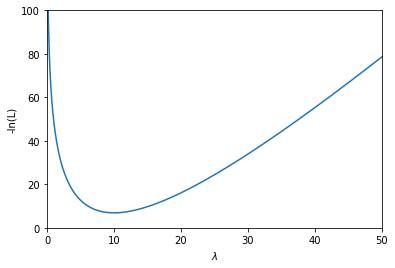

In [7]:
intervall = np.arange(0.001,50,1e-3)
plt.plot(intervall, neg_log_l(intervall))
plt.ylim(0,100)
plt.xlim(0,50)
plt.xlabel(r'$\lambda$')
plt.ylabel('-ln(L)')

### b) Bei welchem Wert liegt das Minimum?
$$ \frac{dL}{d\lambda} = 3 - \frac{30}{\lambda} =0 \rightarrow \lambda = 10  $$

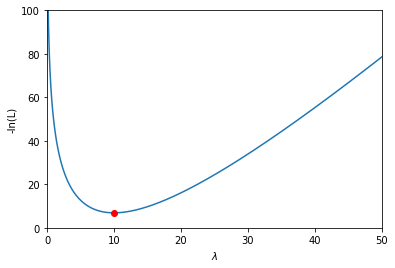

In [8]:
intervall = np.arange(0.001,50,1e-3)
plt.plot(intervall, neg_log_l(intervall))
plt.ylim(0,100)
plt.xlim(0,50)
plt.xlabel(r'$\lambda$')
plt.ylabel('-ln(L)')
plt.plot(10,neg_log_l(10), 'ro')

### c) 
$$ F(\lambda) = F(\lambda_{min}) + r \\ 
\rightarrow  F(\lambda) - F(10) = r \\
\rightarrow -30\ln(\lambda)+3\lambda+30\ln(10)-30 = r \\ 
\leftrightarrow   10\ln(\lambda) = \lambda -10 + 10\ln(10) - \frac{r}{3}.$$
Die Werte sagen folgendes aus: 
$$F(\hat{a} +r\sigma) = F(\hat{a})+\frac{1}{2}r^2.$$
Wir bestimmen die Werte mittels graphisch über Schnittpunkte.

In [10]:
def f_1(x):
    return 10*np.log(x)
def g(x,b):
    return x - 10 + 10*np.log(10) -b

In [11]:
#find indices of intersections of f_1 and g:
idx_1 = np.argwhere(np.diff(np.sign(f_1(intervall) - g(intervall,1/6)))).flatten()
idx_2 = np.argwhere(np.diff(np.sign(f_1(intervall) - g(intervall,2/3)))).flatten()
idx_3 = np.argwhere(np.diff(np.sign(f_1(intervall) - g(intervall,3/2)))).flatten()
intersecs_1 = intervall[idx_1]
intersecs_2 = intervall[idx_2]
intersecs_3 = intervall[idx_3]
intersecs_1, intersecs_2, intersecs_3

(array([ 8.283, 11.938]), array([ 6.778, 14.108]), array([ 5.473, 16.519]))

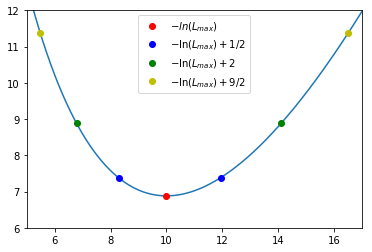

In [12]:
plt.plot(intervall, neg_log_l(intervall))
plt.xlim(5,17)
plt.ylim(6,12)
plt.plot(10,neg_log_l(10), 'ro', label=r'$-ln(L_{max})$')
plt.plot(intervall[idx_1], neg_log_l(intervall[idx_1]), 'bo', label=r'$-\ln(L_{max})+1/2$')
plt.plot(intervall[idx_2], neg_log_l(intervall[idx_2]), 'go', label=r'$-\ln(L_{max})+2$')
plt.plot(intervall[idx_3], neg_log_l(intervall[idx_3]), 'yo', label=r'$-\ln(L_{max})+9/2$')
plt.legend()

### d) Vergleich mit der Taylor-Entwicklung 2. Ordnung 

Zunächst eine Taylor-Entwicklung mittels scipy:

In [15]:
from scipy.interpolate import approximate_taylor_polynomial as taylor
Taylor = taylor(neg_log_l, 10, 2, scale = .1)
def T(x):
    return Taylor[0]+Taylor[1]*(x-10)+ Taylor[2]*(x-10)**2
Taylor

poly1d([ 1.49009301e-01, -2.50003750e-05,  6.88104393e+00])

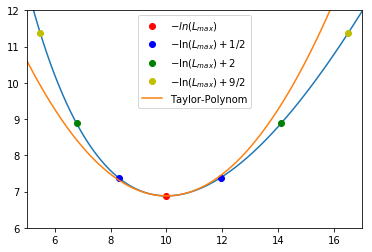

In [8]:
plt.plot(intervall, neg_log_l(intervall))
plt.xlim(5,17)
plt.ylim(6,12)
plt.plot(10,neg_log_l(10), 'ro', label=r'$-ln(L_{max})$')
plt.plot(intervall[idx_1], neg_log_l(intervall[idx_1]), 'bo', label=r'$-\ln(L_{max})+1/2$')
plt.plot(intervall[idx_2], neg_log_l(intervall[idx_2]), 'go', label=r'$-\ln(L_{max})+2$')
plt.plot(intervall[idx_3], neg_log_l(intervall[idx_3]), 'yo', label=r'$-\ln(L_{max})+9/2$')
plt.plot(intervall, T(intervall), label=r'Taylor-Polynom') 
plt.legend()

Wir berechnen wieder wie oben, wann die Taylor-Näherung sich um 1/2 bzw. 2 bzw. 9/2 vom Minimum unterscheidet:

In [9]:
idx_T1 = np.argwhere(np.diff(np.sign(T(intervall) - (neg_log_l(10)+1/2)*np.ones(len(intervall))))).flatten()
idx_T2 = np.argwhere(np.diff(np.sign(T(intervall) - (neg_log_l(10)+2)*np.ones(len(intervall))))).flatten()
idx_T3 = np.argwhere(np.diff(np.sign(T(intervall) - (neg_log_l(10)+9/2)*np.ones(len(intervall))))).flatten()
intersecs_T1 = intervall[idx_T1]
intersecs_T2 = intervall[idx_T2]
intersecs_T3 = intervall[idx_T3]
intersecs_T1, intersecs_T2, intersecs_T3

(array([ 8.168, 11.831]), array([ 6.336, 13.663]), array([ 4.504, 15.495]))

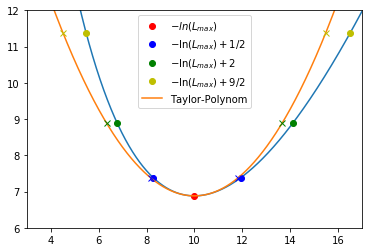

In [10]:
plt.plot(intervall, neg_log_l(intervall))
plt.xlim(3,17)
plt.ylim(6,12)
plt.plot(10,neg_log_l(10), 'ro', label=r'$-ln(L_{max})$')
plt.plot(intervall[idx_1], neg_log_l(intervall[idx_1]), 'bo', label=r'$-\ln(L_{max})+1/2$')
plt.plot(intervall[idx_2], neg_log_l(intervall[idx_2]), 'go', label=r'$-\ln(L_{max})+2$')
plt.plot(intervall[idx_3], neg_log_l(intervall[idx_3]), 'yo', label=r'$-\ln(L_{max})+9/2$')
plt.plot(intervall, T(intervall), label=r'Taylor-Polynom') 
plt.plot(intervall[idx_T1], T(intervall[idx_T1]), 'bx')
plt.plot(intervall[idx_T2], T(intervall[idx_T2]), 'gx')
plt.plot(intervall[idx_T3], T(intervall[idx_T3]), 'yx')
plt.legend()

# Aufgabe 28: Regularisierte kleinste Quadrate

### a) Fit mit Polynom sechsten Grades

In [11]:
data_a = pd.read_csv('aufg_a.csv')
data_a

,x,"""y_0"""
0,0.5,0.132939
1,1.5,0.204351
2,2.5,0.197394
3,3.5,0.157457
4,4.5,0.139232
5,5.5,0.060324
6,6.5,0.056360
7,7.5,0.051944


In [12]:
data_a_x = data_a['x']
data_a_y = data_a.iloc[:,1]

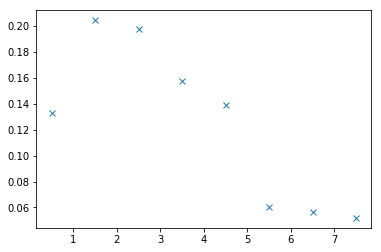

In [13]:
plt.plot(data_a_x, data_a_y, 'x')

Die Modellfunktion ist gegeben durch $$ f(\vec{x},\vec{a}) = a_1 x^6 + a_2 x^5 +a_3 x^4 + a_4 x^3 + a_5 x^2 + a_6 x +a_7. $$

Damit ist die Design-Matrix 
$$ A = \begin{pmatrix} 
x_1^6 & x_1^5 & x_1^4 & x_1^3 & x_1^2 & x_1 &1 \\
x_2^6 & x_2^5 & x_2^4 & x_2^3 & x_2^2 & x_2 &1 \\
\vdots&\vdots&\vdots&\vdots&\vdots&\vdots&\vdots \\
x_8^6 & x_8^5 & x_8^4 & x_8^3 & x_8^2 & x_8 &1\\
\end{pmatrix}.$$

In [14]:
def poly(x,a,b,c,d,e,f,g):
    return a*x**6 + b*x**5 + c*x**4 + d*x**3 + e*x**2 + f*x + g

x_hoch_6 = data_a_x**6
x_hoch_5 = data_a_x**5
x_hoch_4 = data_a_x**4
x_hoch_3 = data_a_x**3
x_hoch_2 = data_a_x**2
x_hoch_1 = data_a_x
x_hoch_0 = np.ones(len(data_a_x))

design_mat = np.matrix(np.array([x_hoch_6, x_hoch_5, x_hoch_4, x_hoch_3, x_hoch_2, x_hoch_1, x_hoch_0]).T)
A = design_mat
A

matrix([[1.56250000e-02, 3.12500000e-02, 6.25000000e-02, 1.25000000e-01,
         2.50000000e-01, 5.00000000e-01, 1.00000000e+00],
        [1.13906250e+01, 7.59375000e+00, 5.06250000e+00, 3.37500000e+00,
         2.25000000e+00, 1.50000000e+00, 1.00000000e+00],
        [2.44140625e+02, 9.76562500e+01, 3.90625000e+01, 1.56250000e+01,
         6.25000000e+00, 2.50000000e+00, 1.00000000e+00],
        [1.83826562e+03, 5.25218750e+02, 1.50062500e+02, 4.28750000e+01,
         1.22500000e+01, 3.50000000e+00, 1.00000000e+00],
        [8.30376562e+03, 1.84528125e+03, 4.10062500e+02, 9.11250000e+01,
         2.02500000e+01, 4.50000000e+00, 1.00000000e+00],
        [2.76806406e+04, 5.03284375e+03, 9.15062500e+02, 1.66375000e+02,
         3.02500000e+01, 5.50000000e+00, 1.00000000e+00],
        [7.54188906e+04, 1.16029062e+04, 1.78506250e+03, 2.74625000e+02,
         4.22500000e+01, 6.50000000e+00, 1.00000000e+00],
        [1.77978516e+05, 2.37304688e+04, 3.16406250e+03, 4.21875000e+02,
         5

Mit der Methode der kleinsten Quadrate ist der Lösungsvektor gegeben durch $$ \vec{a} = (A^TA)^{-1}A^T \vec{y}.  $$

In [15]:
a = np.linalg.inv(A.T@A)@A.T@data_a_y 
a

array([-1.96288195e-04,  4.78568046e-03, -4.52007749e-02,  2.10566520e-01,
       -5.13748210e-01,  6.09609033e-01, -6.74453239e-02])

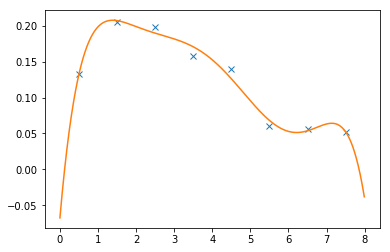

In [16]:
x_intervall = np.arange(0,8,1e-2)
plt.plot(data_a_x, data_a_y, 'x')
plt.plot(x_intervall, poly(x_intervall, a[0], a[1],a[2],a[3],a[4],a[5],a[6]))

Spaßeshalber ein Vergleich mit Scipy: exakt getroffen

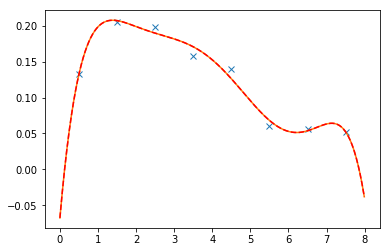

In [18]:
params, cov = curve_fit(poly,data_a_x, data_a_y)
x_intervall = np.arange(0,8,1e-2)
plt.plot(data_a_x, data_a_y, 'x')
plt.plot(x_intervall, poly(x_intervall,a[0], a[1],a[2],a[3],a[4],a[5],a[6]))
plt.plot(x_intervall, poly(x_intervall, *params), 'r--')

### b) Regularisierung
Die Regularisierungsmatrix ist hier $$ \Gamma = \sqrt{\lambda}CA, $$
damit ist der regularisierte Schätzer $$ \vec{a}_{\text{reg}} = (A^TA +\Gamma^T\Gamma)^{-1}A^T\vec{y}. $$

In [19]:
C = np.matrix(np.zeros((8,8)))

C += np.diag(-2*np.ones(8))
C += np.diag(np.ones(7), k=1)
C += np.diag(np.ones(7), k=-1)

C[(0,0)] = -1
C[(-1,-1)] = -1

C

matrix([[-1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 1., -2.,  1.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  1., -2.,  1.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  1., -2.,  1.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  1., -2.,  1.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  1., -2.,  1.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  1., -2.,  1.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  1., -1.]])

In [20]:
lambdasch = [0.1,0.3,0.7,3,10]
Gamma_0 = C*A
vecs = []
for i in lambdasch:
    Gamma = np.sqrt(i)*Gamma_0
    a_reg = np.linalg.inv((A.T*A + Gamma.T*Gamma))*A.T@data_a_y
    vecs.append(a_reg)

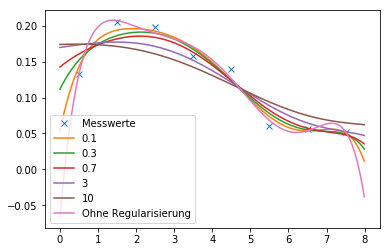

In [21]:
x_intervall = np.arange(0,8,1e-2)


plt.plot(data_a_x, data_a_y, 'x', label='Messwerte')
plt.plot(x_intervall, poly(x_intervall, vecs[0][0], vecs[0][1],vecs[0][2],vecs[0][3],vecs[0][4],vecs[0][5],vecs[0][6]), label=lambdasch[0])
plt.plot(x_intervall, poly(x_intervall, vecs[1][0], vecs[1][1],vecs[1][2],vecs[1][3],vecs[1][4],vecs[1][5],vecs[1][6]), label=lambdasch[1])
plt.plot(x_intervall, poly(x_intervall, vecs[2][0], vecs[2][1],vecs[2][2],vecs[2][3],vecs[2][4],vecs[2][5],vecs[2][6]), label=lambdasch[2])
plt.plot(x_intervall, poly(x_intervall, vecs[3][0], vecs[3][1],vecs[3][2],vecs[3][3],vecs[3][4],vecs[3][5],vecs[3][6]), label=lambdasch[3])
plt.plot(x_intervall, poly(x_intervall, vecs[4][0], vecs[4][1],vecs[4][2],vecs[4][3],vecs[4][4],vecs[4][5],vecs[4][6]), label=lambdasch[4])
plt.plot(x_intervall, poly(x_intervall, a[0], a[1],a[2],a[3],a[4],a[5],a[6]), label='Ohne Regularisierung')
plt.legend()

# c) Gewichtete kleinste Quadrate

In [27]:
data_c = pd.read_csv('aufg_c.csv')
data_c

,x,"""y_0","""y_1","""y_2","""y_3","""y_4","""y_5","""y_6","""y_7","""y_8",...,"""y_40","""y_41","""y_42","""y_43","""y_44","""y_45","""y_46","""y_47","""y_48","""y_49"
0,0.5,0.103939,0.149753,0.112739,0.184439,0.145831,0.113267,0.155455,0.155187,0.105173,...,0.080580,0.111108,0.122147,0.146955,0.076564,0.114331,0.132773,0.167562,0.135968,0.131620
1,1.5,0.219092,0.193544,0.160651,0.170565,0.184050,0.163337,0.212139,0.166457,0.186264,...,0.206292,0.215006,0.147765,0.164665,0.238038,0.203325,0.203236,0.213183,0.223799,0.148379
2,2.5,0.177677,0.166459,0.236241,0.205570,0.197066,0.230060,0.170907,0.181053,0.186724,...,0.182444,0.188019,0.144067,0.239231,0.103315,0.198792,0.201374,0.197383,0.126766,0.193543
3,3.5,0.139580,0.163861,0.167301,0.141728,0.143816,0.161717,0.153893,0.131928,0.110090,...,0.179982,0.169037,0.213696,0.157921,0.229623,0.207216,0.125185,0.119271,0.212534,0.193191
4,4.5,0.115663,0.112004,0.111168,0.102507,0.108234,0.085693,0.113646,0.148677,0.199207,...,0.114844,0.126542,0.161769,0.111842,0.142766,0.097612,0.132306,0.101199,0.085060,0.094930
5,5.5,0.094581,0.089400,0.079080,0.066638,0.063737,0.101826,0.066393,0.092533,0.082094,...,0.103984,0.055161,0.073740,0.091454,0.069506,0.064214,0.104694,0.063192,0.094040,0.098975
6,6.5,0.086982,0.058229,0.081565,0.072236,0.088597,0.079524,0.062805,0.063917,0.060868,...,0.065893,0.055365,0.074342,0.052247,0.070997,0.055187,0.042896,0.085384,0.053749,0.068896
7,7.5,0.062485,0.066751,0.051256,0.056316,0.068670,0.064577,0.064761,0.060249,0.069581,...,0.065981,0.079762,0.062473,0.035685,0.069191,0.059323,0.057535,0.052826,0.068084,0.070466


In [29]:
labels = ['x',]
for i in range (50):
    labels.append('y_'+str(i))
c_data = pd.DataFrame(data_c.values, columns=labels)
c_data

,x,y_0,y_1,y_2,y_3,y_4,y_5,y_6,y_7,y_8,...,y_40,y_41,y_42,y_43,y_44,y_45,y_46,y_47,y_48,y_49
0,0.5,0.103939,0.149753,0.112739,0.184439,0.145831,0.113267,0.155455,0.155187,0.105173,...,0.080580,0.111108,0.122147,0.146955,0.076564,0.114331,0.132773,0.167562,0.135968,0.131620
1,1.5,0.219092,0.193544,0.160651,0.170565,0.184050,0.163337,0.212139,0.166457,0.186264,...,0.206292,0.215006,0.147765,0.164665,0.238038,0.203325,0.203236,0.213183,0.223799,0.148379
2,2.5,0.177677,0.166459,0.236241,0.205570,0.197066,0.230060,0.170907,0.181053,0.186724,...,0.182444,0.188019,0.144067,0.239231,0.103315,0.198792,0.201374,0.197383,0.126766,0.193543
3,3.5,0.139580,0.163861,0.167301,0.141728,0.143816,0.161717,0.153893,0.131928,0.110090,...,0.179982,0.169037,0.213696,0.157921,0.229623,0.207216,0.125185,0.119271,0.212534,0.193191
4,4.5,0.115663,0.112004,0.111168,0.102507,0.108234,0.085693,0.113646,0.148677,0.199207,...,0.114844,0.126542,0.161769,0.111842,0.142766,0.097612,0.132306,0.101199,0.085060,0.094930
5,5.5,0.094581,0.089400,0.079080,0.066638,0.063737,0.101826,0.066393,0.092533,0.082094,...,0.103984,0.055161,0.073740,0.091454,0.069506,0.064214,0.104694,0.063192,0.094040,0.098975
6,6.5,0.086982,0.058229,0.081565,0.072236,0.088597,0.079524,0.062805,0.063917,0.060868,...,0.065893,0.055365,0.074342,0.052247,0.070997,0.055187,0.042896,0.085384,0.053749,0.068896
7,7.5,0.062485,0.066751,0.051256,0.056316,0.068670,0.064577,0.064761,0.060249,0.069581,...,0.065981,0.079762,0.062473,0.035685,0.069191,0.059323,0.057535,0.052826,0.068084,0.070466


In [41]:
mean_c = np.mean(c_data.iloc[:,1:].values, axis=1)
std_c = np.std(c_data.iloc[:,1:], axis = 1)
mean_c = np.matrix(mean_c.reshape(-1,1))
mean_c, std_c
W = np.matrix(np.diag(1/std_c**2))
W

matrix([[1645.49676109,    0.        ,    0.        ,    0.        ,
            0.        ,    0.        ,    0.        ,    0.        ],
        [   0.        , 1151.09052971,    0.        ,    0.        ,
            0.        ,    0.        ,    0.        ,    0.        ],
        [   0.        ,    0.        , 1055.45979858,    0.        ,
            0.        ,    0.        ,    0.        ,    0.        ],
        [   0.        ,    0.        ,    0.        , 1007.86963526,
            0.        ,    0.        ,    0.        ,    0.        ],
        [   0.        ,    0.        ,    0.        ,    0.        ,
         2027.19577757,    0.        ,    0.        ,    0.        ],
        [   0.        ,    0.        ,    0.        ,    0.        ,
            0.        , 3107.80160489,    0.        ,    0.        ],
        [   0.        ,    0.        ,    0.        ,    0.        ,
            0.        ,    0.        , 6043.10753224,    0.        ],
        [   0.        ,    

In [55]:
v_2 = np.linalg.inv(A.T*W*A)*A.T*W*mean_c #Siehe gedrucktes Skript
v_2 = np.array(v_2).reshape(-1)
v_2

array([ 2.56958575e-05, -7.34894294e-04,  7.91884435e-03, -3.75650741e-02,
        6.17000858e-02,  1.92955242e-02,  1.03975571e-01])

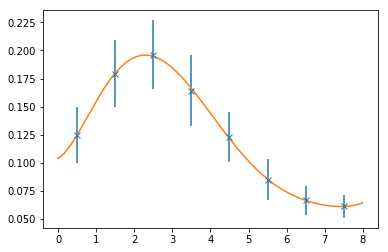

In [61]:
x_intervall = np.arange(0,8,1e-2)
plt.errorbar(x=data_c['x'], y=mean_c, yerr=std_c, fmt='x')
plt.plot(x_intervall, poly(x_intervall, v_2[0], v_2[1], v_2[2], v_2[3], v_2[4], v_2[5], v_2[6]))